<a href="https://colab.research.google.com/gist/Larinwa/a236eb8a53bc498b609cdcd1e7954ae0/deep_learning_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMAGE CLASSIFICATION WITH ANN

In [ ]:
import torch
from torch import nn
from torch import optim

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

### Data Preparation

In [ ]:
# setup transformation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

# import the dataset
train_data = torchvision.datasets.MNIST(root = './data', train = True,
                                        download = True, transform=transform)
test_data = torchvision.datasets.MNIST(root = './data', train = False,
                                        download = True, transform=transform)

# set up the dataloader
train_loader = DataLoader(dataset = train_data, batch_size = 64, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size = 64, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 40.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.18MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.55MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



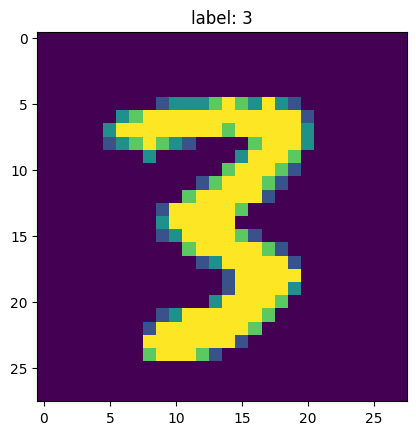

In [ ]:
## inspect the images

for image, label in train_loader:
  image = image[15].detach().numpy()
  label = label[15]
  image = image.reshape(28, 28)
  plt.imshow(image)
  plt.title(f'label: {label}')
  break

In [ ]:
# train the neural network

class Image_Ann(nn.Module):

  def __init__(self) -> None:
    super().__init__()
    self.input_layer = nn.Linear(28*28, 500)
    self.fc1 = nn.Linear(500, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.out = nn.Linear(64, 10)

  def forward(self, x:torch.tensor):

    x = x.view(-1, 28*28)
    result = torch.relu(self.input_layer(x))
    result = torch.relu(self.fc1(result))
    result = torch.relu(self.fc2(result))
    result = torch.relu(self.fc3(result))
    result = self.out(result)

    return result

In [ ]:
# initialize the model, optimizer, criterion, learning rate, epoch

model = Image_Ann()
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4
epochs = 5
optimizer = optim.SGD(params = model.parameters(), lr=learning_rate)

In [ ]:
# set up the training loop

for epoch in range(epochs):
  training_loss = 0.0
  for i, (image, label) in enumerate(train_loader):
    # wipe gradients
    optimizer.zero_grad()

    # forward pass
    train_preds = model(image)
    loss = criterion(train_preds, label)

    # back propagate
    loss.backward()
    optimizer.step()

    training_loss += loss.item()
    if (i % 100) == 0:
      print(f'Epoch: {epoch+1}/{epochs}...step: {i}/{len(train_loader)}...Loss: {loss.item()}')

  print(f'Epoch: {epoch+1}/{epochs}.....Loss: {training_loss/len(train_loader)}')

Epoch: 1/5...step: 0/938...Loss: 2.3092660903930664
Epoch: 1/5...step: 100/938...Loss: 1.1810911893844604
Epoch: 1/5...step: 200/938...Loss: 0.7995656728744507
Epoch: 1/5...step: 300/938...Loss: 0.44711920619010925
Epoch: 1/5...step: 400/938...Loss: 0.6035884022712708
Epoch: 1/5...step: 500/938...Loss: 0.41447657346725464
Epoch: 1/5...step: 600/938...Loss: 0.4197411835193634
Epoch: 1/5...step: 700/938...Loss: 0.5173443555831909
Epoch: 1/5...step: 800/938...Loss: 0.32503631711006165
Epoch: 1/5...step: 900/938...Loss: 0.37931951880455017
Epoch: 1/5.....Loss: 0.6919262602226313
Epoch: 2/5...step: 0/938...Loss: 0.4407918155193329
Epoch: 2/5...step: 100/938...Loss: 0.44452017545700073
Epoch: 2/5...step: 200/938...Loss: 0.3855300545692444
Epoch: 2/5...step: 300/938...Loss: 0.358805388212204
Epoch: 2/5...step: 400/938...Loss: 0.2917380630970001
Epoch: 2/5...step: 500/938...Loss: 0.3531985580921173
Epoch: 2/5...step: 600/938...Loss: 0.34331369400024414
Epoch: 2/5...step: 700/938...Loss: 0.2192

In [ ]:
# evaluate the model
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
  for image, label in test_loader:
    test_pred = model(image)
    _, preds = torch.max(test_pred, 1)
    preds = preds.detach().numpy()
    label = label.detach().numpy()
    all_labels.extend(label)
    all_preds.extend(preds)

<Axes: >

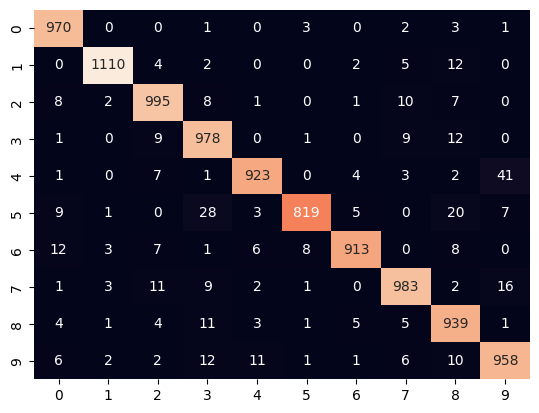

In [ ]:
import seaborn as sns


sns.heatmap(data = confusion_matrix(all_labels, all_preds),
            annot = True, cbar = False, fmt = 'd')

In [ ]:
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.93      0.97      0.95      1010
           4       0.97      0.94      0.96       982
           5       0.98      0.92      0.95       892
           6       0.98      0.95      0.97       958
           7       0.96      0.96      0.96      1028
           8       0.93      0.96      0.94       974
           9       0.94      0.95      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
torch.max(test_pred, 1)

torch.return_types.max(
values=tensor([ 5.0572, 10.0814,  5.8615,  9.1214,  9.5158,  6.6479,  5.7087,  9.2443,
        11.5256,  7.7962,  8.3372,  9.3526,  8.1468,  8.3563,  3.2146,  7.8459]),
indices=tensor([4, 9, 2, 0, 0, 1, 0, 7, 3, 5, 0, 3, 2, 5, 4, 0]))

In [ ]:
test_pred

tensor([[  0.0847,  -6.0915,  -2.1836,  -5.3816,   5.0572,  -1.6188,  -2.5016,
           1.1139,  -1.0013,   2.9665],
        [ -4.0607,  -5.9262,  -4.4516,   0.0495,   4.5871,  -1.8977, -12.0636,
           3.7705,   1.9786,  10.0814],
        [  0.2222,   0.8086,   5.8615,   2.3511,  -8.0490,  -1.8485,  -0.7114,
          -4.0872,   1.3665,  -8.3436],
        [  9.1214,  -2.8407,   1.8359,  -4.2757,  -6.0658,  -0.8113,   1.5936,
          -3.1498,  -2.6733,  -3.6296],
        [  9.5158,  -3.0137,   1.2422,  -2.4521,  -5.7157,   0.2946,   0.2549,
          -0.6645,  -4.6960,  -2.6284],
        [ -4.2805,   6.6479,  -0.5699,  -1.9706,  -1.5191,  -3.1893,  -3.8230,
           2.3883,   1.6750,  -0.7705],
        [  5.7087,  -4.9054,   0.2530,  -2.5470,  -4.0570,  -2.1386,  -2.1576,
          -1.6046,   0.6462,   0.7090],
        [ -1.9888,  -2.4832,   4.5372,   4.0117,  -5.4753,  -4.9691, -10.9313,
           9.2443,   2.6797,   0.8223],
        [ -4.1534,  -4.1722,  -1.3506,  11.5256,